In [48]:
import os
import cv2
import numpy as np

In [49]:
LABEL_DIR = 'SATELLITE_IMAGE/SRSDD/label'
LABEL_DIR=os.path.normpath(LABEL_DIR)
FILE_PATH=os.path.join(os.getcwd(), LABEL_DIR)

In [50]:
def get_annotations_from_txt(file):
    file=os.path.normpath(file)
    txt_file= os.path.join(os.getcwd(),file)
    boxes=[]
    with open(txt_file, 'r') as l:
        for i in range(2):
            next(l)
        for i in l:
            coors=i.split(' ')[:8]
            coors=[int(c) for c in coors]
            x=(coors[0],coors[1])
            y=(coors[2],coors[3])
            p=(coors[4],coors[5])
            q=(coors[6],coors[7])
            boxes.append([x,y,p,q])
    return boxes
def convert_to_bounding_box(oriented_bbox):
    x = oriented_bbox[0][0]
    y = oriented_bbox[0][1]
    
    w = oriented_bbox[1][0] - oriented_bbox[0][0]
    h = oriented_bbox[3][1] - oriented_bbox[0][1]
    
    
    return [0,x,y,w,h]

def polygon_coordinates(file):
    file=os.path.normpath(file)
    txt_file= os.path.join(os.getcwd(),file)
    boxes=[]
    with open(txt_file, 'r') as l:
        for i in range(2):
            next(l)
        for i in l:
            coors=i.split(' ')[:8]
            coors=[int(c) for c in coors]
            boxes.append(coors)
    return boxes

In [51]:
#output_dir=os.path.normpath('SRSDD\B-Box')
def rec_2_bbox(FILE_PATH, output_dir):
    output_dir=os.path.join(os.getcwd(), output_dir)
    for file in os.listdir(FILE_PATH):
        boxes=get_annotations_from_txt(os.path.join(FILE_PATH,file))
        txt_file=open(os.path.join(output_dir,file),'w')
        b_boxes=[]
        for box in boxes:
            b_box = convert_to_bounding_box(box)
            txt_file.write(" ".join(str(a) for a in b_box)+'\n')

In [52]:
rec_2_bbox(LABEL_DIR, 'SATELLITE_IMAGE/SRSDD/rectangle')

In [53]:
def normalize_bbox(LABEL_DIR,IMG_SIZE,SAVE_DIR):
    for file in os.listdir(LABEL_DIR):
        temp=[]
        with open(os.path.join(LABEL_DIR,file),'r') as f:
            for i in f:
                coor=i.split(' ')
                x = float(coor[1])/IMG_SIZE
                y = float(coor[2])/IMG_SIZE
                w = float(coor[3])/IMG_SIZE
                h = float(coor[4])/IMG_SIZE
                temp.append([0,x,y,w,h])
        txt_file=open(os.path.join(SAVE_DIR,file),'w')
        for t in temp:
            txt_file.write(" ".join(str(a) for a in t)+'\n')
        
           
        
 


In [54]:
rectangle_path='SATELLITE_IMAGE/SRSDD/rectangle'
directory=os.path.join(os.getcwd(),os.path.normpath(rectangle_path))

In [55]:
normalize_bbox(directory, 1024, 'SRSDD/labels')   #### The bbox location

In [82]:

def name_conversion(path,out):
    for file in os.listdir(path):
        #print(file)
        temp=file.split('.')
        name=temp[0].split("_")[0]
        new=name+'.'+temp[-1]
        oldfile=os.path.join(path,file)
        newfile=os.path.join(path,new)
        if os.path.isfile(newfile):
            #print(newfile)
            pass
        try:
            os.rename(oldfile,newfile)
        except:
            pass

In [90]:
DIR=os.path.normpath('SATELLITE_IMAGE/SAR-Ship/images/')
# OUT=os.path.normpath('SATELLITE_IMAGE/SSDD/label/')
name_conversion(DIR,OUT)

In [86]:
def delete_file(path):
    for file in os.listdir(path):
        temp=file.split('.')
        if temp[1]=='rf':
            os.remove(os.path.join(path,file))
        

In [88]:
DIR=os.path.normpath('SATELLITE_IMAGE/SSDD/labels/')
delete_file(DIR)

In [99]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import xml.etree.ElementTree as et
import numpy as np
from PIL import Image
import cv2

In [114]:
def get_bbox_from_xml(PATH):
    tree=et.parse(PATH)
    root=tree.getroot()
    boxes=[]
    for child in root.findall('object'):
        class_name=child.find('name').text
        for subchild in child.findall('bndbox'):
            cx=subchild.find('xmin').text
            cy=subchild.find('ymin').text
            w=subchild.find('xmax').text
            h=subchild.find('ymax').text
            boxes.append([cx,cy,w,h])
    return boxes
                

def plot_image(image,bnd_boxes): #This function is generated using ChatGPT
    img = Image.open(image)
    fig, ax = plt.subplots(1)
    ax.imshow(img)
    for box in boxes:
        x_min, y_min, x_max, y_max = map(int,box)
        width = x_max - x_min
        height = y_max - y_min
        rect = patches.Rectangle((x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        print(rect)
    
    # Show plot
    plt.show()

Rectangle(xy=(84, 159), width=66, height=57, angle=0)
Rectangle(xy=(285, 178), width=44, height=32, angle=0)
Rectangle(xy=(221, 282), width=11, height=70, angle=0)


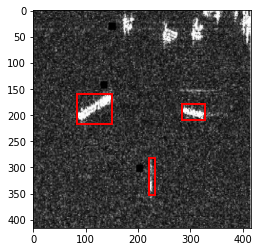

In [115]:
DIR=os.path.normpath('SATELLITE_IMAGE/SSDD/')
IMG=os.path.normpath('images/000006.jpg')
label=os.path.normpath('labels/000006.xml')
IMG_PATH=os.path.join(DIR,IMG)
LABEL_PATH=os.path.join(DIR,label)
boxes=get_bbox_from_xml(LABEL_PATH)
plot_image(IMG_PATH,boxes)